<a href="https://colab.research.google.com/github/emmigalfo/healthcare_nlp/blob/main/HealthChatEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade wordcloud


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# I'm using google colab so I need to import drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Project-HealthcareNLPChat/medquad.csv')
df.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [6]:

df.tail()

,question,answer,source,focus_area
16407,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16408,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16409,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16410,What are the treatments for Diabetic Neuropath...,The first treatment step is to bring blood glu...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16411,What to do for Diabetic Neuropathies: The Nerv...,- Diabetic neuropathies are nerve disorders ca...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...


In [7]:
df.describe()

,question,answer,source,focus_area
count,16412,16407,16412,16398
unique,14984,15817,9,5126
top,What causes Causes of Diabetes ?,This condition is inherited in an autosomal re...,GHR,Breast Cancer
freq,20,348,5430,53


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    16412 non-null  object
 1   answer      16407 non-null  object
 2   source      16412 non-null  object
 3   focus_area  16398 non-null  object
dtypes: object(4)
memory usage: 513.0+ KB


In [9]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16393 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    16393 non-null  object
 1   answer      16393 non-null  object
 2   source      16393 non-null  object
 3   focus_area  16393 non-null  object
dtypes: object(4)
memory usage: 640.4+ KB


## Clean the text data:

* Remove punctuation and special characters.
* Convert all text to lowercase.
* Tokenize the text into individual words or phrases.
* Remove stop words

In [10]:
# Remove Punctuation and Special Characters:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)


In [11]:
# Convert Text to Lowercase:
def to_lowercase(text):
    return text.lower()

In [12]:
# Tokenize Text:
def tokenize_text(text):
    return word_tokenize(text)

In [13]:
# Remove Stop Words:
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [14]:
# Combine functions for pre-processing
def preprocess_text(text):
    text = remove_punctuation(text)
    text = to_lowercase(text)
    tokens = tokenize_text(text)
    tokens = remove_stop_words(tokens)
    return tokens

In [15]:
columns = ['question', 'answer', 'source', 'focus_area']
def preprocess_dataset(df, columns):
    processed_df = df.copy()
    for column in columns:
        processed_df[column] = processed_df[column].apply(preprocess_text)
    return processed_df


In [16]:
preprocessed_df = preprocess_dataset(df, columns)
preprocessed_df

,question,answer,source,focus_area
0,[glaucoma],"[glaucoma, group, diseases, damage, eyes, opti...",[nihseniorhealth],[glaucoma]
1,"[causes, glaucoma]","[nearly, 27, million, people, glaucoma, leadin...",[nihseniorhealth],[glaucoma]
2,"[symptoms, glaucoma]","[symptoms, glaucoma, glaucoma, develop, one, e...",[nihseniorhealth],[glaucoma]
3,"[treatments, glaucoma]","[although, openangle, glaucoma, cured, usually...",[nihseniorhealth],[glaucoma]
4,[glaucoma],"[glaucoma, group, diseases, damage, eyes, opti...",[nihseniorhealth],[glaucoma]
...,...,...,...,...
16407,"[diabetic, neuropathies, nerve, damage, diabetes]","[focal, neuropathy, appears, suddenly, affects...",[niddk],"[diabetic, neuropathies, nerve, damage, diabetes]"
16408,"[prevent, diabetic, neuropathies, nerve, damag...","[best, way, prevent, neuropathy, keep, blood, ...",[niddk],"[diabetic, neuropathies, nerve, damage, diabetes]"
16409,"[diagnose, diabetic, neuropathies, nerve, dama...","[doctors, diagnose, neuropathy, basis, symptom...",[niddk],"[diabetic, neuropathies, nerve, damage, diabetes]"
16410,"[treatments, diabetic, neuropathies, nerve, da...","[first, treatment, step, bring, blood, glucose...",[niddk],"[diabetic, neuropathies, nerve, damage, diabetes]"


## Explore the data:

* Calculate basic statistics, such as the number of documents, the number of tokens per document, and the frequency of each token.
* Visualize the data using tools such as word clouds, frequency plots, and scatterplots.
* Identify any patterns or trends in the data.

In [17]:
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

def number_of_documents(df):
    return len(df)

In [18]:
def tokens_per_document(df):
    return df.applymap(len)

In [19]:
def frequency_of_each_token(df):
    all_tokens = [token for column in df for tokens_list in df[column] for token in tokens_list]
    return Counter(all_tokens)

In [20]:
def generate_word_cloud(token_frequency):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_frequency)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [21]:
def plot_token_frequencies(token_frequency):
    freq_df = pd.DataFrame(token_frequency.most_common(20), columns=['Token', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Token', data=freq_df)
    plt.title('Top 20 Tokens by Frequency')
    plt.show()

In [22]:
def data_stats_and_vis(df):
    # Calculate basic statistics
    num_docs = number_of_documents(df)
    tokens_per_doc = tokens_per_document(df)
    token_frequency = frequency_of_each_token(df)

    print(f"Number of Documents: {num_docs}")
    print("Tokens per Document:")
    print(tokens_per_doc.describe())

    # Visualize data
    generate_word_cloud(token_frequency)
    plot_token_frequencies(token_frequency)

Number of Documents: 16393
Tokens per Document:
           question        answer   source    focus_area
count  16393.000000  16393.000000  16393.0  16393.000000
mean       3.829134    119.981394      1.0      2.758616
std        1.674282    148.254375      0.0      1.326694
min        1.000000      1.000000      1.0      1.000000
25%        3.000000     44.000000      1.0      2.000000
50%        3.000000     83.000000      1.0      2.000000
75%        5.000000    145.000000      1.0      3.000000
max       18.000000   2583.000000      1.0     14.000000


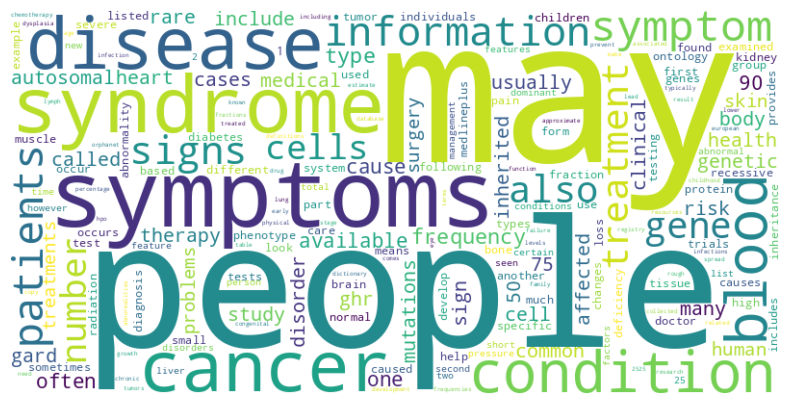

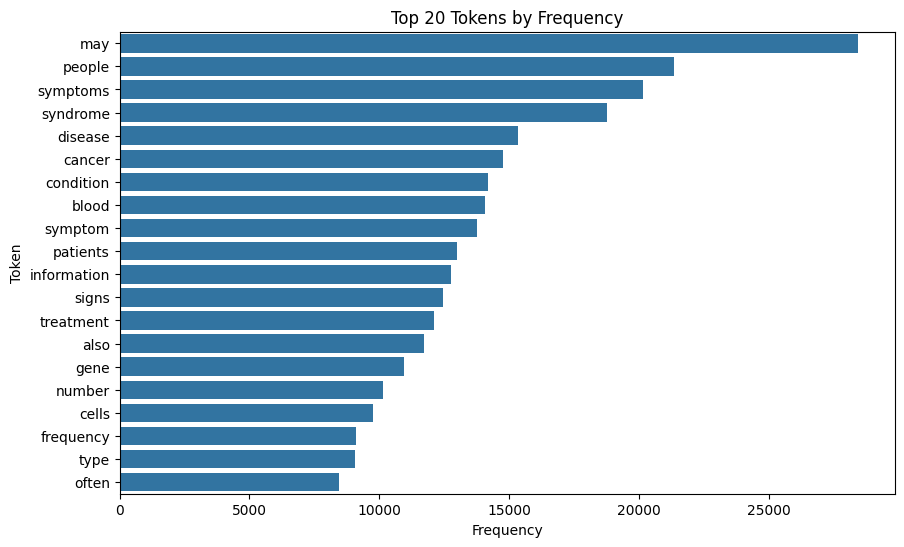

In [23]:
data_stats_and_vis(preprocessed_df)

## Extract features:

* Use TF-IDF (Term Frequency - Inverse Document Frequency) to assign numerical values to each token based on its importance.
* Create a document-term matrix that summarizes the frequency of each token in each document.

In [24]:
preprocessed_df.head()

,question,answer,source,focus_area
0,[glaucoma],"[glaucoma, group, diseases, damage, eyes, opti...",[nihseniorhealth],[glaucoma]
1,"[causes, glaucoma]","[nearly, 27, million, people, glaucoma, leadin...",[nihseniorhealth],[glaucoma]
2,"[symptoms, glaucoma]","[symptoms, glaucoma, glaucoma, develop, one, e...",[nihseniorhealth],[glaucoma]
3,"[treatments, glaucoma]","[although, openangle, glaucoma, cured, usually...",[nihseniorhealth],[glaucoma]
4,[glaucoma],"[glaucoma, group, diseases, damage, eyes, opti...",[nihseniorhealth],[glaucoma]


In [30]:
def combine_rows(df):
    df['question_and_answer'] = df.apply(lambda row: row['question'] + row['answer'], axis=1)
    return df


In [31]:
combined_data = combine_rows(preprocessed_df)
combined_data.head()

,question,answer,source,focus_area,question_and_answer
0,[glaucoma],"[glaucoma, group, diseases, damage, eyes, opti...",[nihseniorhealth],[glaucoma],"[glaucoma, glaucoma, group, diseases, damage, ..."
1,"[causes, glaucoma]","[nearly, 27, million, people, glaucoma, leadin...",[nihseniorhealth],[glaucoma],"[causes, glaucoma, nearly, 27, million, people..."
2,"[symptoms, glaucoma]","[symptoms, glaucoma, glaucoma, develop, one, e...",[nihseniorhealth],[glaucoma],"[symptoms, glaucoma, symptoms, glaucoma, glauc..."
3,"[treatments, glaucoma]","[although, openangle, glaucoma, cured, usually...",[nihseniorhealth],[glaucoma],"[treatments, glaucoma, although, openangle, gl..."
4,[glaucoma],"[glaucoma, group, diseases, damage, eyes, opti...",[nihseniorhealth],[glaucoma],"[glaucoma, glaucoma, group, diseases, damage, ..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# First, we need to convert the list of tokens back to string format for the vectorizer
preprocessed_df['answer_str'] = preprocessed_df['answer'].apply(lambda x: ' '.join(x))

# Custom tokenizer that just splits the string back into tokens
def custom_tokenizer(text):
    return text.split()

# Initialize the TF-IDF Vectorizer with the custom tokenizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, lowercase=False)

# Fit and transform the 'answer_str' column to create the document-term matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_df['answer_str'])

# The `tfidf_matrix` is your document-term matrix


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
tfidf_matrix

<16393x32697 sparse matrix of type '<class 'numpy.float64'>'
	with 1219806 stored elements in Compressed Sparse Row format>